In [ ]:
import os
RECURSOS_DIR = "../../Recursos" 
archivos = os.listdir(RECURSOS_DIR )
print(os.getcwd())



In [ ]:
%matplotlib inline
import sys
sys.path.append(RECURSOS_DIR )

import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn import metrics

from grafica import *
from grafica_Grad import *

In [21]:
# Ejemplos de entrada
X = np.array([2, 1, -1])

# Salida esperada para cada ejemplo
Y = np.array([3, 1, -3])


In [24]:
# --- puntos, titulos y ph se utilizan sólo para dibujar ---

X = X.reshape(-1,1)  # convierte a X en un vector columna
Y = Y.reshape(-1,1)  # lo mismo para Y (esto es sólo para dibujar)
puntos = np.concatenate((X,Y), axis=1)

titulos = np.array(['X','Y'])
ph=0  # manejador de la figura para ir cambiando la recta de lugar

[[ 2]
 [ 1]
 [-1]]


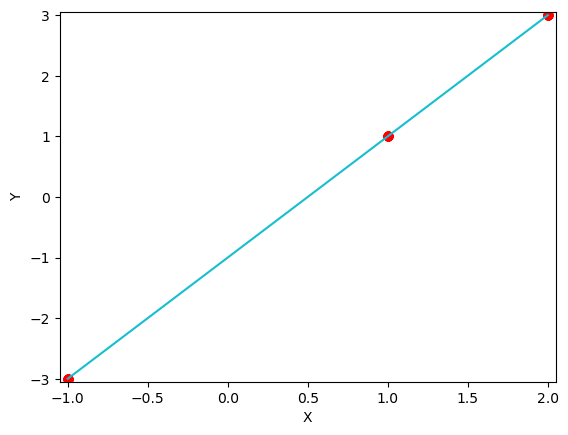

ite 50


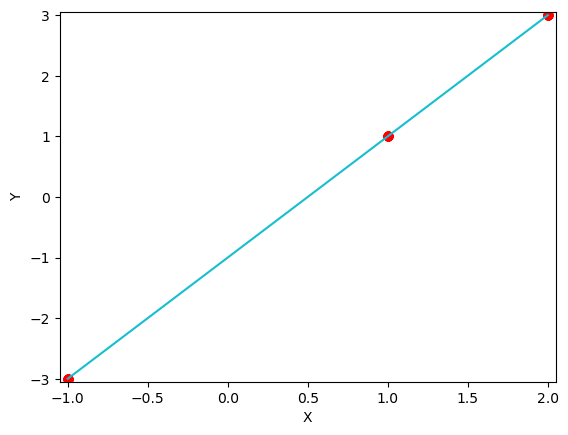

In [40]:
#--- parámetros del COMBINADOR LINEAL ---
MAX_ITE = 50
alfa = 0.05

#--- Los pesos iniciales son aleatorios
W = np.random.uniform(-0.5, 0.5,size=X.shape[1])
b = np.random.uniform(-0.5, 0.5)

W = np.array([7]) #np.random.uniform(-5, 5,size=X.shape[1])
b = np.array([7.5]) #np.random.uniform(-5, 5)


#--- al finalizar ERRORES debe contener el ECM de c/iteración ---
errores = []

# --- Entrenamiento del combinador lineal ---
nEjem = X.shape[0]  # nro. de filas
nAtrib = X.shape[1] #nro. de columnas

Ptos = []

ite = 0 #Numero de iteraciones realizadas
ErrorAnt = 0 #Error anterior (es un escalar)
ErrorAct = (1/3)*(19-20*W-2*b+6*W*W+4*W*b+3*b*b) #Error actual es un array de un solo valor 1D 
cotaError = 10e-10 #Cota 0.00006 (Tasa de error a la que aspiramos)

while (ite < MAX_ITE) and (np.abs(ErrorAnt- ErrorAct) > cotaError): #Mientras las iteraciones no superen el maximos y la diferencia absoluta entre el error anterior y el actual sea > a la cota 
    PtoAnt = [b[0], W[0], ErrorAct[0]] #Crea un punto en el espacio
    ErrorAnt = ErrorAct
    ErrorAct = 0
    for e in range(nEjem): #E itera en la cantidad de filas
        
        # Calcular y  (la salida del combinador lineal)
        neta = W[0]*X[e] + b
        y = neta #Neta es un array de un solo valor, multiplicacion de W[0] -> unico valor, con X en la fila e + b

        errorXi = Y[e]-y #Y contiene los valores de salida esperados, resta el valor de Y en la fila e al y obtenido, resulta el error obtenido
        
        #Al haber hecho la regla de la cadena y demas, obtenemos que la derivada con respecto a W era -2 * error * X[num fila] 

        grad_W = -2 * errorXi * X[e] #Multiplicamos el valor del error por el input en esa fila 
        grad_b = -2 * errorXi * 1 #Lo mismo para b
        
        W= W - alfa * grad_W #A cada valor del vector W (en este caso 1 solo) le restamos la multipicacion del learning rate por el gradiente nuevo
        b   = b - alfa * grad_b 
        
        ErrorAct = ErrorAct + errorXi**2 #Sumo al error actual el error obtenido al cuadrado por si da negativo
    
    errores.append(ErrorAct/nEjem)  # promedio de los errores al cuadrado
    
    # graficar la recta
    ph = dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos, ph)

    ErrorAct = (1/3)*(19-20*W-2*b+6*W*W+4*W*b+3*b*b)  #Solo para graficar
    PtoAct = [b[0], W[0], ErrorAct[0]]
    Ptos.append([PtoAnt, PtoAct])
    
    ite = ite + 1
    print("ite %d" % ite)

In [41]:
print("W = ", W)
print("b = ", b)

W =  [1.99996575]
b =  [-0.99993149]


In [ ]:
crearAnimacion(4,Ptos)

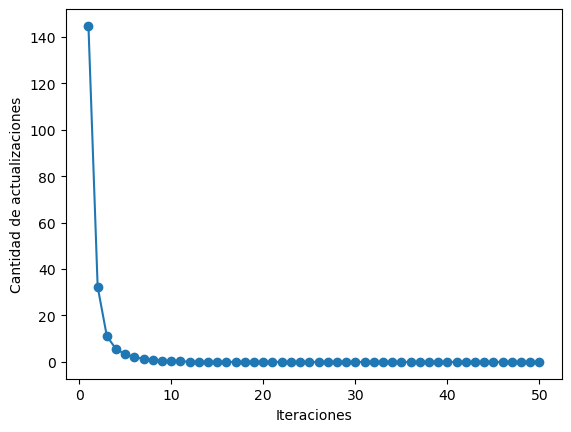

In [42]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [48]:

for i in range(X.shape[0]):
    print(W[0]*X[i] + b)

print("Valores esperados: 3 1 -3" )

[3.]
[1.00003425]
[-2.99989724]
Valores esperados: 3 1 -3
